In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/planet_data.csv", comment="#")
df.head()

/tmp/ipykernel_2863/463418602.py:5: DtypeWarning: Columns (37,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/planet_data.csv", comment="#")


,pl_name,default_flag,sy_snum,sy_pnum,sy_mnum,disc_year,soltype,pl_controv_flag,pl_refname,pl_orbper,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,1,2,1,0,2007,Published Confirmed,0,<a refstr=TENG_ET_AL__2023 href=https://ui.ads...,323.21,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 Com b,0,2,1,0,2007,Published Confirmed,0,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,NaN,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
2,11 Com b,0,2,1,0,2007,Published Confirmed,0,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,326.03,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
3,11 UMi b,0,1,1,0,2009,Published Confirmed,0,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,NaN,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
4,11 UMi b,0,1,1,0,2009,Published Confirmed,0,<a refstr=DOLLINGER_ET_AL__2009 href=https://u...,516.22,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903


In [3]:
df.columns.tolist()

['pl_name',
 'default_flag',
 'sy_snum',
 'sy_pnum',
 'sy_mnum',
 'disc_year',
 'soltype',
 'pl_controv_flag',
 'pl_refname',
 'pl_orbper',
 'pl_orbpererr1',
 'pl_orbpererr2',
 'pl_orbperlim',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_orbsmaxlim',
 'pl_rade',
 'pl_radeerr1',
 'pl_radeerr2',
 'pl_radelim',
 'pl_masse',
 'pl_masseerr1',
 'pl_masseerr2',
 'pl_masselim',
 'pl_msinie',
 'pl_msinieerr1',
 'pl_msinieerr2',
 'pl_msinielim',
 'pl_cmasse',
 'pl_cmasseerr1',
 'pl_cmasseerr2',
 'pl_cmasselim',
 'pl_bmasse',
 'pl_bmasseerr1',
 'pl_bmasseerr2',
 'pl_bmasselim',
 'pl_bmassprov',
 'pl_dens',
 'pl_denserr1',
 'pl_denserr2',
 'pl_denslim',
 'pl_orbeccen',
 'pl_orbeccenerr1',
 'pl_orbeccenerr2',
 'pl_orbeccenlim',
 'pl_insol',
 'pl_insolerr1',
 'pl_insolerr2',
 'pl_insollim',
 'pl_eqt',
 'pl_eqterr1',
 'pl_eqterr2',
 'pl_eqtlim',
 'ttv_flag',
 'st_refname',
 'st_spectype',
 'st_teff',
 'st_tefferr1',
 'st_tefferr2',
 'st_tefflim',
 'st_rad',
 'st_raderr1',
 'st_raderr2',


In [4]:
columns = ["pl_name", "pl_rade", "pl_bmasse", "pl_orbsmax", "st_teff"]
df_small = df[columns]
df_small.head()

,pl_name,pl_rade,pl_bmasse,pl_orbsmax,st_teff
0,11 Com b,NaN,4914.898486,1.178,4874.0
1,11 Com b,NaN,5434.700000,1.210,NaN
2,11 Com b,NaN,6165.600000,1.290,4742.0
3,11 UMi b,NaN,3432.400000,1.510,NaN
4,11 UMi b,NaN,3337.070000,1.540,4340.0


In [5]:
df_clean = df_small.dropna(subset=["pl_rade", "pl_bmasse", "pl_orbsmax", "st_teff"])
df_clean.head()

,pl_name,pl_rade,pl_bmasse,pl_orbsmax,st_teff
29,1RXS J160929.1-210524 b,18.64700,2543.000,330.00000,4060.0
39,2MASS J02192210-3925225 b,16.14096,4417.837,156.00000,3064.0
107,55 Cnc e,1.91000,8.080,0.01544,5250.0
114,55 Cnc e,1.92000,8.080,0.01544,5250.0
117,55 Cnc e,2.17300,8.370,0.01583,5250.0


In [6]:
df_clean = df_clean.rename(columns={
    "pl_name": "Planet Name",
    "pl_rade": "Planet Radius (Earth)",
    "pl_bmasse": "Planet Mass (Earth)",
    "pl_orbsmax": "Orbital Distance (AU)",
    "st_teff": "Star Temperature (K)"
})

df_clean.head()

,Planet Name,Planet Radius (Earth),Planet Mass (Earth),Orbital Distance (AU),Star Temperature (K)
29,1RXS J160929.1-210524 b,18.64700,2543.000,330.00000,4060.0
39,2MASS J02192210-3925225 b,16.14096,4417.837,156.00000,3064.0
107,55 Cnc e,1.91000,8.080,0.01544,5250.0
114,55 Cnc e,1.92000,8.080,0.01544,5250.0
117,55 Cnc e,2.17300,8.370,0.01583,5250.0


In [7]:
df2 = df_clean.copy()

R_MIN, R_MAX = 0.5, 2.0
M_MIN, M_MAX = 0.1, 10.0
T_MIN, T_MAX = 2600, 7200
AU_MIN, AU_MAX = 0.75, 2.0

is_size_ok = df2["Planet Radius (Earth)"].between(R_MIN, R_MAX)
is_mass_ok = df2["Planet Mass (Earth)"].between(M_MIN, M_MAX)
is_star_ok = df2["Star Temperature (K)"].between(T_MIN, T_MAX)
is_orbit_ok = df2["Orbital Distance (AU)"].between(AU_MIN, AU_MAX)

In [8]:
df2["Habitability Label"] = (is_size_ok & is_mass_ok & is_star_ok & is_orbit_ok).astype(int)

df2["Habitability Label"].value_counts()
df2.head(10)

,Planet Name,Planet Radius (Earth),Planet Mass (Earth),Orbital Distance (AU),Star Temperature (K),Habitability Label
29,1RXS J160929.1-210524 b,18.647000,2543.0000,330.00000,4060.0,0
39,2MASS J02192210-3925225 b,16.140960,4417.8370,156.00000,3064.0,0
107,55 Cnc e,1.910000,8.0800,0.01544,5250.0,0
114,55 Cnc e,1.920000,8.0800,0.01544,5250.0,0
117,55 Cnc e,2.173000,8.3700,0.01583,5250.0,0
119,55 Cnc e,2.080000,7.8100,0.01544,5234.0,0
121,55 Cnc e,1.875000,7.9900,0.01544,5172.0,0
166,AU Mic b,4.203375,57.2094,0.06600,3700.0,0
171,AU Mic b,4.070000,17.0000,0.06450,3700.0,0
178,AU Mic c,3.240000,13.6000,0.11010,3700.0,0


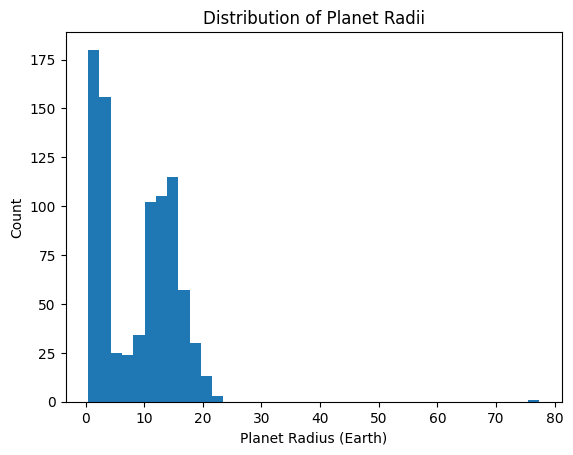

In [9]:
plt.hist(df2["Planet Radius (Earth)"], bins=40)
plt.xlabel("Planet Radius (Earth)")
plt.ylabel("Count")
plt.title("Distribution of Planet Radii")
plt.show()

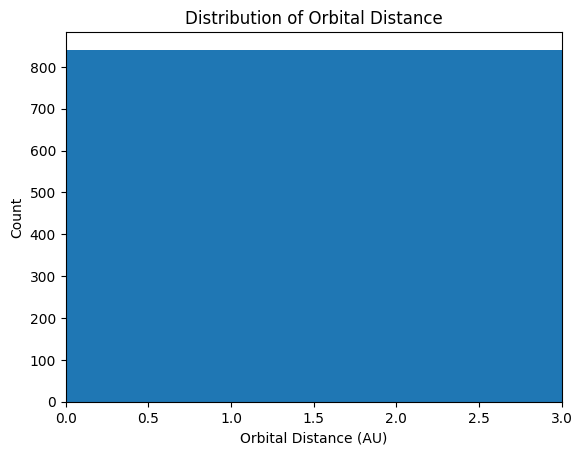

In [10]:
plt.hist(df2["Orbital Distance (AU)"], bins=40)
plt.xlabel("Orbital Distance (AU)")
plt.ylabel("Count")
plt.title("Distribution of Orbital Distance")
plt.xlim(0, 3)
plt.show()

In [11]:
print("Radius OK:", is_size_ok.sum())
print("Mass OK:", is_mass_ok.sum())
print("Star Temp OK:", is_star_ok.sum())
print("Orbit OK:", is_orbit_ok.sum())

Radius OK: 137
Mass OK: 234
Star Temp OK: 827
Orbit OK: 5
